In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib_venn import venn3, venn3_circles, venn2, venn2_circles
import seaborn as sns
from scipy.stats import spearmanr, pearsonr
from gtfparse import read_gtf
import warnings
warnings.filterwarnings('ignore')

## Read mass spectrometry results

In [3]:
zfp_2h_vs_zfp_dmso = pd.read_excel('./degs/20230615_Project_689_ZFP_2h_versus_ZFP_DMSO.xlsx', sheet_name = 0, skiprows = 1)
zfp_6h_vs_zfp_dmso = pd.read_excel('./degs/20230615_Project_689_ZFP_6h_versus_ZFP_DMSO.xlsx', sheet_name = 0, skiprows = 1)
zfp_24h_vs_zfp_dmso = pd.read_excel('./degs/20230615_Project_689_ZFP_24h_versus_ZFP_DMSO.xlsx', sheet_name = 0, skiprows = 1)

e14_2h_vs_e14_dmso = pd.read_excel('./degs/20230615_Project_689_e14_2h_versus_e14_DMSO.xlsx', sheet_name = 0, skiprows = 1)
e14_6h_vs_e14_dmso = pd.read_excel('./degs/20230615_Project_689_e14_6h_versus_e14_DMSO.xlsx', sheet_name = 0, skiprows = 1)
e14_24h_vs_e14_dmso = pd.read_excel('./degs/20230615_Project_689_e14_24h_versus_e14_DMSO.xlsx', sheet_name = 0, skiprows = 1)

## Arrange ranked list for GSEA

In [4]:
genes = read_gtf('../gencode.vM25.annotation.gtf')
genes = genes[genes['feature'] == 'gene']
genes = genes[['seqname', 'start', 'end', 'strand', 'gene_id', 'gene_type', 'gene_name']]
genes.head()

INFO:root:Extracted GTF attributes: ['gene_id', 'gene_type', 'gene_name', 'level', 'mgi_id', 'havana_gene', 'transcript_id', 'transcript_type', 'transcript_name', 'transcript_support_level', 'tag', 'havana_transcript', 'exon_number', 'exon_id', 'protein_id', 'ccdsid', 'ont']


,seqname,start,end,strand,gene_id,gene_type,gene_name
0,chr1,3073253,3074322,+,ENSMUSG00000102693.1,TEC,4933401J01Rik
3,chr1,3102016,3102125,+,ENSMUSG00000064842.1,snRNA,Gm26206
6,chr1,3205901,3671498,-,ENSMUSG00000051951.5,protein_coding,Xkr4
24,chr1,3252757,3253236,+,ENSMUSG00000102851.1,processed_pseudogene,Gm18956
27,chr1,3365731,3368549,-,ENSMUSG00000103377.1,TEC,Gm37180


In [5]:
def create_gsea_gene_list(df, gtf):
    genes_gsea, fold_changes_gsea = [], []
    df = df.sort_values("Student's T-test Difference")[['gene_name', "Student's T-test Difference"]]
    for genes, fc in zip(df['gene_name'].values, df["Student's T-test Difference"].values):
        for g in str(genes).split(';'):
            genes_gsea.append(g)
            fold_changes_gsea.append(fc)
    gsea = pd.DataFrame({'gene_name': genes_gsea, 'fc': fold_changes_gsea})
    return(gsea.merge(gtf, on = 'gene_name').sort_values(['fc']))

In [6]:
create_gsea_gene_list(zfp_2h_vs_zfp_dmso, genes)[['gene_name', 'fc']].to_csv('./gsea/genes_2H.ranked.rnk', header = 0, index = 0, sep = '\t')
create_gsea_gene_list(zfp_6h_vs_zfp_dmso, genes)[['gene_name', 'fc']].to_csv('./gsea/genes_6H.ranked.rnk', header = 0, index = 0, sep = '\t')
create_gsea_gene_list(zfp_24h_vs_zfp_dmso, genes)[['gene_name', 'fc']].to_csv('./gsea/genes_24H.ranked.rnk', header = 0, index = 0, sep = '\t')

create_gsea_gene_list(zfp_2h_vs_zfp_dmso, genes)[['gene_id', 'fc']].to_csv('./gsea/genes_2H.ranked.ensid.rnk', header = 0, index = 0, sep = '\t')
create_gsea_gene_list(zfp_6h_vs_zfp_dmso, genes)[['gene_id', 'fc']].to_csv('./gsea/genes_6H.ranked.ensid.rnk', header = 0, index = 0, sep = '\t')
create_gsea_gene_list(zfp_24h_vs_zfp_dmso, genes)[['gene_id', 'fc']].to_csv('./gsea/genes_24H.ranked.ensid.rnk', header = 0, index = 0, sep = '\t')

In [7]:
create_gsea_gene_list(e14_2h_vs_e14_dmso, genes)[['gene_name', 'fc']].to_csv('./gsea/genes_E14_2H.ranked.rnk', header = 0, index = 0, sep = '\t')
create_gsea_gene_list(e14_6h_vs_e14_dmso, genes)[['gene_name', 'fc']].to_csv('./gsea/genes_E14_6H.ranked.rnk', header = 0, index = 0, sep = '\t')
create_gsea_gene_list(e14_24h_vs_e14_dmso, genes)[['gene_name', 'fc']].to_csv('./gsea/genes_E14_24H.ranked.rnk', header = 0, index = 0, sep = '\t')

create_gsea_gene_list(e14_2h_vs_e14_dmso, genes)[['gene_id', 'fc']].to_csv('./gsea/genes_E14_2H.ranked.ensid.rnk', header = 0, index = 0, sep = '\t')
create_gsea_gene_list(e14_6h_vs_e14_dmso, genes)[['gene_id', 'fc']].to_csv('./gsea/genes_E14_6H.ranked.ensid.rnk', header = 0, index = 0, sep = '\t')
create_gsea_gene_list(e14_24h_vs_e14_dmso, genes)[['gene_id', 'fc']].to_csv('./gsea/genes_E14_24H.ranked.ensid.rnk', header = 0, index = 0, sep = '\t')

## Volcano plots

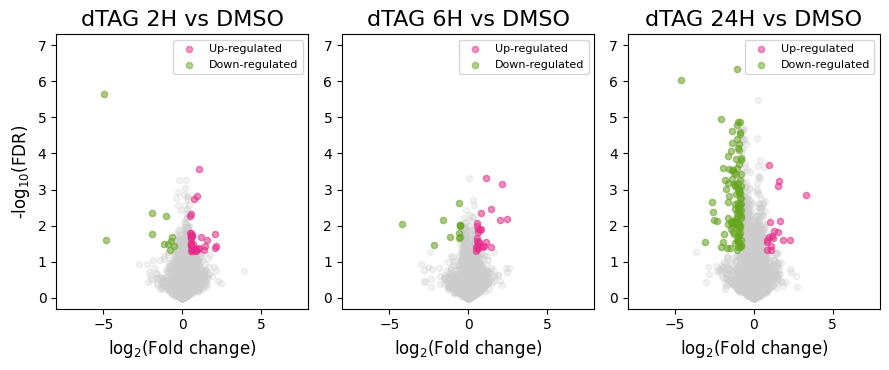

In [8]:
plt.figure(figsize = (9, 3.8))

plt.subplot(131)
plt.title('dTAG 2H vs DMSO', fontsize = 16)
plt.scatter(zfp_2h_vs_zfp_dmso["Student's T-test Difference"], zfp_2h_vs_zfp_dmso["-Log Student's T-test p-value"],
            color = '#CCCCCC', label = '_nolegend_', alpha = 0.25, s = 20)
plt.scatter(zfp_2h_vs_zfp_dmso[(zfp_2h_vs_zfp_dmso['significant or not'] == 'Significant') & (zfp_2h_vs_zfp_dmso["Student's T-test Difference"] > 0)]["Student's T-test Difference"],
            zfp_2h_vs_zfp_dmso[(zfp_2h_vs_zfp_dmso['significant or not'] == 'Significant') & (zfp_2h_vs_zfp_dmso["Student's T-test Difference"] > 0)]["-Log Student's T-test p-value"],
            color = '#E72A8A', label = 'Up-regulated', alpha = 0.5, s = 20)
plt.scatter(zfp_2h_vs_zfp_dmso[(zfp_2h_vs_zfp_dmso['significant or not'] == 'Significant') & (zfp_2h_vs_zfp_dmso["Student's T-test Difference"] < 0)]["Student's T-test Difference"],
            zfp_2h_vs_zfp_dmso[(zfp_2h_vs_zfp_dmso['significant or not'] == 'Significant') & (zfp_2h_vs_zfp_dmso["Student's T-test Difference"] < 0)]["-Log Student's T-test p-value"],
            color = '#66A61E', label = 'Down-regulated', alpha = 0.5, s = 20)
plt.xlabel('log$_2$(Fold change)', fontsize = 12)
plt.ylabel('-log$_{10}$(FDR)', fontsize = 12)
plt.xlim((-8, 8))
plt.ylim((-0.3, 7.3))
plt.legend(loc = 'upper right', fontsize = 8)

plt.subplot(132)
plt.title('dTAG 6H vs DMSO', fontsize = 16)
plt.scatter(zfp_6h_vs_zfp_dmso["Student's T-test Difference"], zfp_6h_vs_zfp_dmso["-Log Student's T-test p-value"],
            color = '#CCCCCC', label = '_nolegend_', alpha = 0.25, s = 20)
plt.scatter(zfp_6h_vs_zfp_dmso[(zfp_6h_vs_zfp_dmso['significant or not'] == 'Significant') & (zfp_6h_vs_zfp_dmso["Student's T-test Difference"] > 0)]["Student's T-test Difference"],
            zfp_6h_vs_zfp_dmso[(zfp_6h_vs_zfp_dmso['significant or not'] == 'Significant') & (zfp_6h_vs_zfp_dmso["Student's T-test Difference"] > 0)]["-Log Student's T-test p-value"],
            color = '#E72A8A', label = 'Up-regulated', alpha = 0.5, s = 20)
plt.scatter(zfp_6h_vs_zfp_dmso[(zfp_6h_vs_zfp_dmso['significant or not'] == 'Significant') & (zfp_6h_vs_zfp_dmso["Student's T-test Difference"] < 0)]["Student's T-test Difference"],
            zfp_6h_vs_zfp_dmso[(zfp_6h_vs_zfp_dmso['significant or not'] == 'Significant') & (zfp_6h_vs_zfp_dmso["Student's T-test Difference"] < 0)]["-Log Student's T-test p-value"],
            color = '#66A61E', label = 'Down-regulated', alpha = 0.5, s = 20)
plt.xlabel('log$_2$(Fold change)', fontsize = 12)
plt.xlim((-8, 8))
plt.ylim((-0.3, 7.3))
plt.legend(loc = 'upper right', fontsize = 8)

plt.subplot(133)
plt.title('dTAG 24H vs DMSO', fontsize = 16)
plt.scatter(zfp_24h_vs_zfp_dmso["Student's T-test Difference"], zfp_24h_vs_zfp_dmso["-Log Student's T-test p-value"],
            color = '#CCCCCC', label = '_nolegend_', alpha = 0.25, s = 20)
plt.scatter(zfp_24h_vs_zfp_dmso[(zfp_24h_vs_zfp_dmso['significant or not'] == 'Significant') & (zfp_24h_vs_zfp_dmso["Student's T-test Difference"] > 0)]["Student's T-test Difference"],
            zfp_24h_vs_zfp_dmso[(zfp_24h_vs_zfp_dmso['significant or not'] == 'Significant') & (zfp_24h_vs_zfp_dmso["Student's T-test Difference"] > 0)]["-Log Student's T-test p-value"],
            color = '#E72A8A', label = 'Up-regulated', alpha = 0.5, s = 20)
plt.scatter(zfp_24h_vs_zfp_dmso[(zfp_24h_vs_zfp_dmso['significant or not'] == 'Significant') & (zfp_24h_vs_zfp_dmso["Student's T-test Difference"] < 0)]["Student's T-test Difference"],
            zfp_24h_vs_zfp_dmso[(zfp_24h_vs_zfp_dmso['significant or not'] == 'Significant') & (zfp_24h_vs_zfp_dmso["Student's T-test Difference"] < 0)]["-Log Student's T-test p-value"],
            color = '#66A61E', label = 'Down-regulated', alpha = 0.5, s = 20)
plt.xlabel('log$_2$(Fold change)', fontsize = 12)
plt.xlim((-8, 8))
plt.ylim((-0.3, 7.3))
plt.legend(loc = 'upper right', fontsize = 8)

plt.tight_layout()
plt.show()

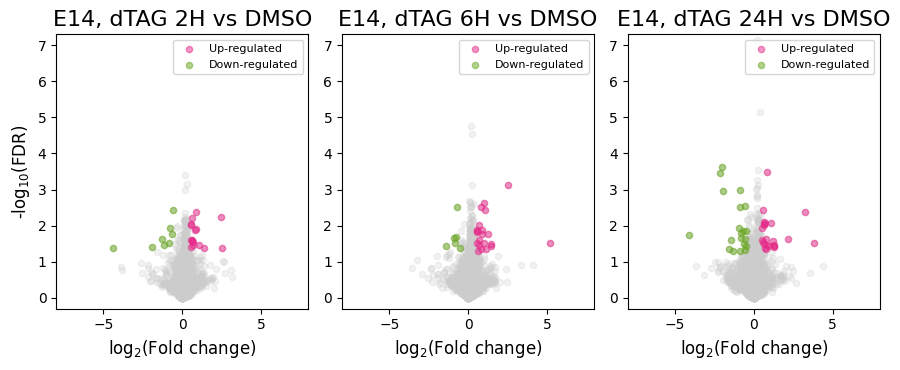

In [9]:
plt.figure(figsize = (9, 3.8))

plt.subplot(131)
plt.title('E14, dTAG 2H vs DMSO', fontsize = 16)
plt.scatter(e14_2h_vs_e14_dmso["Student's T-test Difference"], e14_2h_vs_e14_dmso["-Log Student's T-test p-value"],
            color = '#CCCCCC', label = '_nolegend_', alpha = 0.25, s = 20)
plt.scatter(e14_2h_vs_e14_dmso[(e14_2h_vs_e14_dmso['significant or not'] == 'Significant') & (e14_2h_vs_e14_dmso["Student's T-test Difference"] > 0)]["Student's T-test Difference"],
            e14_2h_vs_e14_dmso[(e14_2h_vs_e14_dmso['significant or not'] == 'Significant') & (e14_2h_vs_e14_dmso["Student's T-test Difference"] > 0)]["-Log Student's T-test p-value"],
            color = '#E72A8A', label = 'Up-regulated', alpha = 0.5, s = 20)
plt.scatter(e14_2h_vs_e14_dmso[(e14_2h_vs_e14_dmso['significant or not'] == 'Significant') & (e14_2h_vs_e14_dmso["Student's T-test Difference"] < 0)]["Student's T-test Difference"],
            e14_2h_vs_e14_dmso[(e14_2h_vs_e14_dmso['significant or not'] == 'Significant') & (e14_2h_vs_e14_dmso["Student's T-test Difference"] < 0)]["-Log Student's T-test p-value"],
            color = '#66A61E', label = 'Down-regulated', alpha = 0.5, s = 20)
plt.xlabel('log$_2$(Fold change)', fontsize = 12)
plt.ylabel('-log$_{10}$(FDR)', fontsize = 12)
plt.xlim((-8, 8))
plt.ylim((-0.3, 7.3))
plt.legend(loc = 'upper right', fontsize = 8)

plt.subplot(132)
plt.title('E14, dTAG 6H vs DMSO', fontsize = 16)
plt.scatter(e14_6h_vs_e14_dmso["Student's T-test Difference"], e14_6h_vs_e14_dmso["-Log Student's T-test p-value"],
            color = '#CCCCCC', label = '_nolegend_', alpha = 0.25, s = 20)
plt.scatter(e14_6h_vs_e14_dmso[(e14_6h_vs_e14_dmso['significant or not'] == 'Significant') & (e14_6h_vs_e14_dmso["Student's T-test Difference"] > 0)]["Student's T-test Difference"],
            e14_6h_vs_e14_dmso[(e14_6h_vs_e14_dmso['significant or not'] == 'Significant') & (e14_6h_vs_e14_dmso["Student's T-test Difference"] > 0)]["-Log Student's T-test p-value"],
            color = '#E72A8A', label = 'Up-regulated', alpha = 0.5, s = 20)
plt.scatter(e14_6h_vs_e14_dmso[(e14_6h_vs_e14_dmso['significant or not'] == 'Significant') & (e14_6h_vs_e14_dmso["Student's T-test Difference"] < 0)]["Student's T-test Difference"],
            e14_6h_vs_e14_dmso[(e14_6h_vs_e14_dmso['significant or not'] == 'Significant') & (e14_6h_vs_e14_dmso["Student's T-test Difference"] < 0)]["-Log Student's T-test p-value"],
            color = '#66A61E', label = 'Down-regulated', alpha = 0.5, s = 20)
plt.xlabel('log$_2$(Fold change)', fontsize = 12)
plt.xlim((-8, 8))
plt.ylim((-0.3, 7.3))
plt.legend(loc = 'upper right', fontsize = 8)

plt.subplot(133)
plt.title('E14, dTAG 24H vs DMSO', fontsize = 16)
plt.scatter(e14_24h_vs_e14_dmso["Student's T-test Difference"], e14_24h_vs_e14_dmso["-Log Student's T-test p-value"],
            color = '#CCCCCC', label = '_nolegend_', alpha = 0.25, s = 20)
plt.scatter(e14_24h_vs_e14_dmso[(e14_24h_vs_e14_dmso['significant or not'] == 'Significant') & (e14_24h_vs_e14_dmso["Student's T-test Difference"] > 0)]["Student's T-test Difference"],
            e14_24h_vs_e14_dmso[(e14_24h_vs_e14_dmso['significant or not'] == 'Significant') & (e14_24h_vs_e14_dmso["Student's T-test Difference"] > 0)]["-Log Student's T-test p-value"],
            color = '#E72A8A', label = 'Up-regulated', alpha = 0.5, s = 20)
plt.scatter(e14_24h_vs_e14_dmso[(e14_24h_vs_e14_dmso['significant or not'] == 'Significant') & (e14_24h_vs_e14_dmso["Student's T-test Difference"] < 0)]["Student's T-test Difference"],
            e14_24h_vs_e14_dmso[(e14_24h_vs_e14_dmso['significant or not'] == 'Significant') & (e14_24h_vs_e14_dmso["Student's T-test Difference"] < 0)]["-Log Student's T-test p-value"],
            color = '#66A61E', label = 'Down-regulated', alpha = 0.5, s = 20)
plt.xlabel('log$_2$(Fold change)', fontsize = 12)
plt.xlim((-8, 8))
plt.ylim((-0.3, 7.3))
plt.legend(loc = 'upper right', fontsize = 8)

plt.tight_layout()
plt.show()

## Data arrangement

In [10]:
degs_2H_up = pd.read_csv('../ttseq/degs/degs_2H_up.bed', sep = '\t')
degs_2H_down = pd.read_csv('../ttseq/degs/degs_2H_down.bed', sep = '\t')
degs_2H_stable = pd.read_csv('../ttseq/degs/degs_2H_stable.bed', sep = '\t')
degs_2H_up['ttseq'] = ['up']*len(degs_2H_up)
degs_2H_down['ttseq'] = ['down']*len(degs_2H_down)
degs_2H_stable['ttseq'] = ['stable']*len(degs_2H_stable)
degs_2H = pd.concat([degs_2H_up, degs_2H_down, degs_2H_stable])

degs_6H_up = pd.read_csv('../ttseq/degs/degs_6H_up.bed', sep = '\t')
degs_6H_down = pd.read_csv('../ttseq/degs/degs_6H_down.bed', sep = '\t')
degs_6H_stable = pd.read_csv('../ttseq/degs/degs_6H_stable.bed', sep = '\t')
degs_6H_up['ttseq'] = ['up']*len(degs_6H_up)
degs_6H_down['ttseq'] = ['down']*len(degs_6H_down)
degs_6H_stable['ttseq'] = ['stable']*len(degs_6H_stable)
degs_6H = pd.concat([degs_6H_up, degs_6H_down, degs_6H_stable])

degs_24H_up = pd.read_csv('../ttseq/degs/degs_24H_up.bed', sep = '\t')
degs_24H_down = pd.read_csv('../ttseq/degs/degs_24H_down.bed', sep = '\t')
degs_24H_stable = pd.read_csv('../ttseq/degs/degs_24H_stable.bed', sep = '\t')
degs_24H_up['ttseq'] = ['up']*len(degs_24H_up)
degs_24H_down['ttseq'] = ['down']*len(degs_24H_down)
degs_24H_stable['ttseq'] = ['stable']*len(degs_24H_stable)
degs_24H = pd.concat([degs_24H_up, degs_24H_down, degs_24H_stable])

In [11]:
daps_zfp143_2H_up = zfp_2h_vs_zfp_dmso[(zfp_2h_vs_zfp_dmso['significant or not'] == 'Significant') & (zfp_2h_vs_zfp_dmso["Student's T-test Difference"] > 0)]
daps_zfp143_2H_down = zfp_2h_vs_zfp_dmso[(zfp_2h_vs_zfp_dmso['significant or not'] == 'Significant') & (zfp_2h_vs_zfp_dmso["Student's T-test Difference"] < 0)]
daps_zfp143_2H_stable = zfp_2h_vs_zfp_dmso[zfp_2h_vs_zfp_dmso['significant or not'] == 'Not_significant']
daps_zfp143_2H_up['massspec'] = ['up']*len(daps_zfp143_2H_up)
daps_zfp143_2H_down['massspec'] = ['down']*len(daps_zfp143_2H_down)
daps_zfp143_2H_stable['massspec'] = ['stable']*len(daps_zfp143_2H_stable)
daps_zfp143_2H = pd.concat([daps_zfp143_2H_up, daps_zfp143_2H_down, daps_zfp143_2H_stable])

daps_zfp143_6H_up = zfp_6h_vs_zfp_dmso[(zfp_6h_vs_zfp_dmso['significant or not'] == 'Significant') & (zfp_6h_vs_zfp_dmso["Student's T-test Difference"] > 0)]
daps_zfp143_6H_down = zfp_6h_vs_zfp_dmso[(zfp_6h_vs_zfp_dmso['significant or not'] == 'Significant') & (zfp_6h_vs_zfp_dmso["Student's T-test Difference"] < 0)]
daps_zfp143_6H_stable = zfp_6h_vs_zfp_dmso[zfp_6h_vs_zfp_dmso['significant or not'] == 'Not_significant']
daps_zfp143_6H_up['massspec'] = ['up']*len(daps_zfp143_6H_up)
daps_zfp143_6H_down['massspec'] = ['down']*len(daps_zfp143_6H_down)
daps_zfp143_6H_stable['massspec'] = ['stable']*len(daps_zfp143_6H_stable)
daps_zfp143_6H = pd.concat([daps_zfp143_6H_up, daps_zfp143_6H_down, daps_zfp143_6H_stable])

daps_zfp143_24H_up = zfp_24h_vs_zfp_dmso[(zfp_24h_vs_zfp_dmso['significant or not'] == 'Significant') & (zfp_24h_vs_zfp_dmso["Student's T-test Difference"] > 0)]
daps_zfp143_24H_down = zfp_24h_vs_zfp_dmso[(zfp_24h_vs_zfp_dmso['significant or not'] == 'Significant') & (zfp_24h_vs_zfp_dmso["Student's T-test Difference"] < 0)]
daps_zfp143_24H_stable = zfp_24h_vs_zfp_dmso[zfp_24h_vs_zfp_dmso['significant or not'] == 'Not_significant']
daps_zfp143_24H_up['massspec'] = ['up']*len(daps_zfp143_24H_up)
daps_zfp143_24H_down['massspec'] = ['down']*len(daps_zfp143_24H_down)
daps_zfp143_24H_stable['massspec'] = ['stable']*len(daps_zfp143_24H_stable)
daps_zfp143_24H = pd.concat([daps_zfp143_24H_up, daps_zfp143_24H_down, daps_zfp143_24H_stable])

In [12]:
daps_zfp143_2H_upd = []
for gene in daps_zfp143_2H.values:
    if ';' in str(gene[2]):
        for i in range(0, len(gene[2].split(';'))):
            daps_zfp143_2H_upd.append([gene[0].split(';')[i], gene[1].split(';')[i], gene[2].split(';')[i]] + list(gene[3:]))
    else:
        daps_zfp143_2H_upd.append(gene)
        
daps_zfp143_2H_upd = pd.DataFrame(daps_zfp143_2H_upd)
daps_zfp143_2H_upd.columns = daps_zfp143_2H.columns

daps_zfp143_6H_upd = []
for gene in daps_zfp143_6H.values:
    if ';' in str(gene[2]):
        for i in range(0, len(gene[2].split(';'))):
            daps_zfp143_6H_upd.append([gene[0].split(';')[i], gene[1].split(';')[i], gene[2].split(';')[i]] + list(gene[3:]))
    else:
        daps_zfp143_6H_upd.append(gene)
        
daps_zfp143_6H_upd = pd.DataFrame(daps_zfp143_6H_upd)
daps_zfp143_6H_upd.columns = daps_zfp143_6H.columns

daps_zfp143_24H_upd = []
for gene in daps_zfp143_24H.values:
    if ';' in str(gene[2]):
        for i in range(0, len(gene[2].split(';'))):
            daps_zfp143_24H_upd.append([gene[0].split(';')[i], gene[1].split(';')[i], gene[2].split(';')[i]] + list(gene[3:]))
    else:
        daps_zfp143_24H_upd.append(gene)
        
daps_zfp143_24H_upd = pd.DataFrame(daps_zfp143_24H_upd)
daps_zfp143_24H_upd.columns = daps_zfp143_24H.columns

In [13]:
tt_ms_2H = degs_2H.merge(daps_zfp143_2H_upd, how = 'outer', on = 'gene_name')
tt_ms_2H = tt_ms_2H[['seqname', 'start', 'end', 'gene_name', 'gene_type', 'ttseq', 'massspec', 
                     'gene_id', 'log2FoldChange', 'padj',
                     'Uniprot Accession', "Student's T-test Difference", "-Log Student's T-test p-value"]]

tt_ms_6H = degs_6H.merge(daps_zfp143_6H_upd, how = 'outer', on = 'gene_name')
tt_ms_6H = tt_ms_6H[['seqname', 'start', 'end', 'gene_name', 'gene_type', 'ttseq', 'massspec', 
                     'gene_id', 'log2FoldChange', 'padj',
                     'Uniprot Accession', "Student's T-test Difference", "-Log Student's T-test p-value"]]

tt_ms_24H = degs_24H.merge(daps_zfp143_24H_upd, how = 'outer', on = 'gene_name')
tt_ms_24H = tt_ms_24H[['seqname', 'start', 'end', 'gene_name', 'gene_type', 'ttseq', 'massspec', 
                       'gene_id', 'log2FoldChange', 'padj',
                       'Uniprot Accession', "Student's T-test Difference", "-Log Student's T-test p-value"]]

## Overlap with ZFP143 targets

In [19]:
zfp143_target_genes = pd.read_csv('../chipseq/annotations/ZFP143_target_genes.gene_name.txt', header = None)[0].values

In [20]:
fractions_targets, numbers_targets = [], []
for gene_set in [daps_zfp143_2H_down, daps_zfp143_6H_down, daps_zfp143_24H_down, 
                 daps_zfp143_2H_up, daps_zfp143_6H_up, daps_zfp143_24H_up,
                 daps_zfp143_2H_stable, daps_zfp143_6H_stable, daps_zfp143_24H_stable]:
    number_of_targets = len([x for x in gene_set['gene_name'].values if x in zfp143_target_genes])
    numbers_targets.append(number_of_targets)
    fractions_targets.append(round(number_of_targets / len(gene_set), 3))

In [21]:
print('2H DOWN: %s out of %s' % (numbers_targets[0], len(daps_zfp143_2H_down)))
print('6H DOWN: %s out of %s' % (numbers_targets[1], len(daps_zfp143_6H_down)))
print('24H DOWN: %s out of %s' % (numbers_targets[2], len(daps_zfp143_24H_down)))
print()
print('2H UP: %s out of %s' % (numbers_targets[3], len(daps_zfp143_2H_up)))
print('6H UP: %s out of %s' % (numbers_targets[4], len(daps_zfp143_6H_up)))
print('24H UP: %s out of %s' % (numbers_targets[5], len(daps_zfp143_24H_up)))
print()
print('2H STABLE: %s out of %s' % (numbers_targets[6], len(daps_zfp143_2H_stable)))
print('6H STABLE: %s out of %s' % (numbers_targets[7], len(daps_zfp143_6H_stable)))
print('24H STABLE: %s out of %s' % (numbers_targets[8], len(daps_zfp143_24H_stable)))

2H DOWN: 1 out of 11
6H DOWN: 7 out of 11
24H DOWN: 80 out of 110

2H UP: 2 out of 37
6H UP: 6 out of 26
24H UP: 5 out of 18

2H STABLE: 1159 out of 6623
6H STABLE: 1146 out of 6621
24H STABLE: 1073 out of 6525


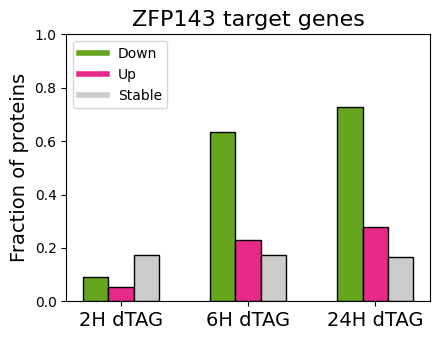

In [22]:
plt.figure(figsize = (4.5, 3.5))
plt.title('ZFP143 target genes', fontsize = 16)
plt.bar(list(np.arange(0, 6, 2)-0.4) + list(np.arange(0, 6, 2)) + list(np.arange(0, 6, 2)+0.4), fractions_targets, 
        width = 0.4, edgecolor = 'k', color = ['#66A61E', '#66A61E', '#66A61E', '#E72A8A', '#E72A8A', '#E72A8A', '#CCCCCC', '#CCCCCC', '#CCCCCC'])
plt.xticks([0, 2, 4], ['2H dTAG', '6H dTAG', '24H dTAG'], fontsize = 14)
plt.ylabel('Fraction of proteins', fontsize = 14)
plt.ylim((0, 1))

custom_lines = [Line2D([0], [0], color='#66A61E', lw=4),
                Line2D([0], [0], color='#E72A8A', lw=4),
                Line2D([0], [0], color='#CCCCCC', lw=4)]
plt.legend(custom_lines, ['Down', 'Up', 'Stable'], loc = 'upper left')

plt.tight_layout()
plt.show()

## Comparing mass spectrometry and TT-seq

SpearmanrResult(correlation=0.10602882015121337, pvalue=7.297904236728758e-05)
(0.05325514088128047, 0.04689325373826167)
SpearmanrResult(correlation=0.3672043987229372, pvalue=2.3008087775836838e-45)
(0.24210530748557396, 7.625102453111936e-20)
SpearmanrResult(correlation=0.5100428590917307, pvalue=1.8600530710923632e-92)
(0.5085402781116992, 1.4159360583446323e-91)


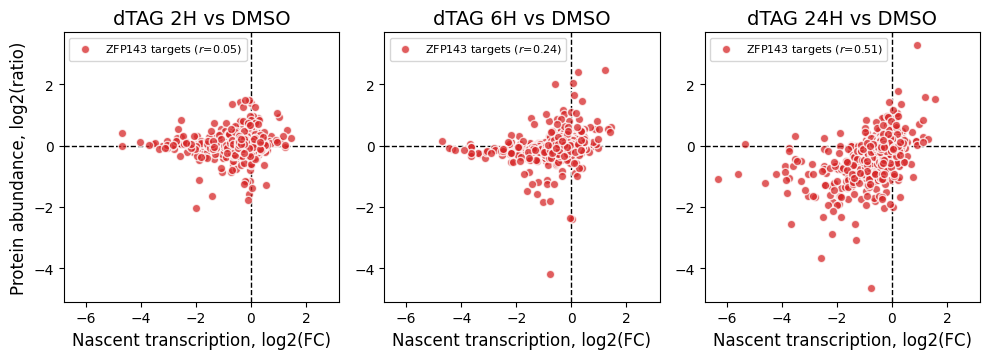

In [23]:
plt.figure(figsize = (10, 3.7))

plt.subplot(131)
plt.title('dTAG 2H vs DMSO', fontsize = 14)
corr = spearmanr(tt_ms_2H[tt_ms_2H['gene_name'].isin(zfp143_target_genes)]['log2FoldChange'], 
                 tt_ms_2H[tt_ms_2H['gene_name'].isin(zfp143_target_genes)]["Student's T-test Difference"], nan_policy = 'omit')
print(corr)
corr = pearsonr(tt_ms_2H[tt_ms_2H['gene_name'].isin(zfp143_target_genes)].dropna()['log2FoldChange'], 
                tt_ms_2H[tt_ms_2H['gene_name'].isin(zfp143_target_genes)].dropna()["Student's T-test Difference"])
print(corr)
plt.scatter(tt_ms_2H[tt_ms_2H['gene_name'].isin(zfp143_target_genes)]['log2FoldChange'], 
            tt_ms_2H[tt_ms_2H['gene_name'].isin(zfp143_target_genes)]["Student's T-test Difference"],
            edgecolor = 'w', alpha = 0.75, color = 'C3', label = r'ZFP143 targets ($r$=' + str(round(corr[0], 2)) + ')')
plt.axhline(0, ls = '--', zorder = 0, color = 'k', lw = 1)
plt.axvline(0, ls = '--', zorder = 0, color = 'k', lw = 1)
plt.xlabel('Nascent transcription, log2(FC)', fontsize = 12)
plt.ylabel('Protein abundance, log2(ratio)', fontsize = 12)
plt.xlim((-6.8, 3.2))
plt.ylim((-5.1, 3.7))
plt.xticks([-6, -4, -2, 0, 2])
plt.yticks([-4, -2, 0, 2])
plt.legend(loc = 'upper left', fontsize = 8)

plt.subplot(132)
plt.title('dTAG 6H vs DMSO', fontsize = 14)
corr = spearmanr(tt_ms_6H[tt_ms_6H['gene_name'].isin(zfp143_target_genes)]['log2FoldChange'], 
                 tt_ms_6H[tt_ms_6H['gene_name'].isin(zfp143_target_genes)]["Student's T-test Difference"], nan_policy = 'omit')
print(corr)
corr = pearsonr(tt_ms_6H[tt_ms_6H['gene_name'].isin(zfp143_target_genes)].dropna()['log2FoldChange'], 
                tt_ms_6H[tt_ms_6H['gene_name'].isin(zfp143_target_genes)].dropna()["Student's T-test Difference"])
print(corr)
plt.scatter(tt_ms_6H[tt_ms_6H['gene_name'].isin(zfp143_target_genes)]['log2FoldChange'], 
            tt_ms_6H[tt_ms_6H['gene_name'].isin(zfp143_target_genes)]["Student's T-test Difference"],
            edgecolor = 'w', alpha = 0.75, color = 'C3', label = r'ZFP143 targets ($r$=' + str(round(corr[0], 2)) + ')')
plt.axhline(0, ls = '--', zorder = 0, color = 'k', lw = 1)
plt.axvline(0, ls = '--', zorder = 0, color = 'k', lw = 1)
plt.xlabel('Nascent transcription, log2(FC)', fontsize = 12)
plt.xlim((-6.8, 3.2))
plt.ylim((-5.1, 3.7))
plt.xticks([-6, -4, -2, 0, 2])
plt.yticks([-4, -2, 0, 2])
plt.legend(loc = 'upper left', fontsize = 8)

plt.subplot(133)
plt.title('dTAG 24H vs DMSO', fontsize = 14)
corr = spearmanr(tt_ms_24H[tt_ms_24H['gene_name'].isin(zfp143_target_genes)]['log2FoldChange'], 
                 tt_ms_24H[tt_ms_24H['gene_name'].isin(zfp143_target_genes)]["Student's T-test Difference"], nan_policy = 'omit')
print(corr)
corr = pearsonr(tt_ms_24H[tt_ms_24H['gene_name'].isin(zfp143_target_genes)].dropna()['log2FoldChange'], 
                tt_ms_24H[tt_ms_24H['gene_name'].isin(zfp143_target_genes)].dropna()["Student's T-test Difference"])
print(corr)
plt.scatter(tt_ms_24H[tt_ms_24H['gene_name'].isin(zfp143_target_genes)]['log2FoldChange'], 
            tt_ms_24H[tt_ms_24H['gene_name'].isin(zfp143_target_genes)]["Student's T-test Difference"],
            edgecolor = 'w', alpha = 0.75, color = 'C3', label = r'ZFP143 targets ($r$=' + str(round(corr[0], 2)) + ')')
plt.axhline(0, ls = '--', zorder = 0, color = 'k', lw = 1)
plt.axvline(0, ls = '--', zorder = 0, color = 'k', lw = 1)
plt.xlabel('Nascent transcription, log2(FC)', fontsize = 12)
plt.xlim((-6.8, 3.2))
plt.ylim((-5.1, 3.7))
plt.xticks([-6, -4, -2, 0, 2])
plt.yticks([-4, -2, 0, 2])
plt.legend(loc = 'upper left', fontsize = 8)


plt.tight_layout()
plt.show()

## GSEA

### Prepare results table

In [25]:
gsea_folders = sorted([x for x in os.listdir('/DATA/users/magnitov/znf143/mass_spec/gsea/') if 'Gsea' in x])
gsea_folders = [x for x in gsea_folders if ('E14' not in x) and ('GO_BP' in x or 'GO_CC' in x or 'Hallmarks' in x or 'ZFP143_target' in x)]

gsea_data_2H = pd.DataFrame()
for folder in [x for x in gsea_folders if '2H' in x]:
    gsea_pos = pd.read_csv('/DATA/users/magnitov/znf143/mass_spec/gsea/' + folder + '/gsea_report_for_na_pos_' + folder.split('.')[2] + '.tsv', sep = '\t')
    gsea_neg = pd.read_csv('/DATA/users/magnitov/znf143/mass_spec/gsea/' + folder + '/gsea_report_for_na_neg_' + folder.split('.')[2] + '.tsv', sep = '\t')
    gsea_data_2H = pd.concat([gsea_data_2H, gsea_pos, gsea_neg])[['NAME', 'SIZE', 'NES', 'FDR q-val']]
gsea_data_2H.columns = ['NAME', 'SIZE', 'NES_2H', 'FDR_2H']

gsea_data_6H = pd.DataFrame()
for folder in [x for x in gsea_folders if '6H' in x]:
    gsea_pos = pd.read_csv('/DATA/users/magnitov/znf143/mass_spec/gsea/' + folder + '/gsea_report_for_na_pos_' + folder.split('.')[2] + '.tsv', sep = '\t')
    gsea_neg = pd.read_csv('/DATA/users/magnitov/znf143/mass_spec/gsea/' + folder + '/gsea_report_for_na_neg_' + folder.split('.')[2] + '.tsv', sep = '\t')
    gsea_data_6H = pd.concat([gsea_data_6H, gsea_pos, gsea_neg])[['NAME', 'SIZE', 'NES', 'FDR q-val']]
gsea_data_6H.columns = ['NAME', 'SIZE', 'NES_6H', 'FDR_6H']

gsea_data_24H = pd.DataFrame()
for folder in [x for x in gsea_folders if '24H' in x]:
    gsea_pos = pd.read_csv('/DATA/users/magnitov/znf143/mass_spec/gsea/' + folder + '/gsea_report_for_na_pos_' + folder.split('.')[2] + '.tsv', sep = '\t')
    gsea_neg = pd.read_csv('/DATA/users/magnitov/znf143/mass_spec/gsea/' + folder + '/gsea_report_for_na_neg_' + folder.split('.')[2] + '.tsv', sep = '\t')
    gsea_data_24H = pd.concat([gsea_data_24H, gsea_pos, gsea_neg])[['NAME', 'SIZE', 'NES', 'FDR q-val']]
gsea_data_24H.columns = ['NAME', 'SIZE', 'NES_24H', 'FDR_24H']

gsea_data = gsea_data_2H.merge(gsea_data_6H, on = ['NAME']).merge(gsea_data_24H, on = ['NAME'])
gsea_data = gsea_data[[x for x in gsea_data.columns if 'SIZE' not in x]]
gsea_data.head()

,NAME,NES_2H,FDR_2H,NES_6H,FDR_6H,NES_24H,FDR_24H
0,GOBP_DENDRITIC_CELL_CYTOKINE_PRODUCTION,1.707588,1.0,1.577923,1.000000,1.536775,0.800872
1,GOBP_REGULATION_OF_PHOSPHOLIPID_BIOSYNTHETIC_P...,1.698936,1.0,1.669376,1.000000,1.546508,0.779856
2,GOBP_PHOSPHATIDYLCHOLINE_BIOSYNTHETIC_PROCESS,1.683691,1.0,1.546821,1.000000,1.493970,0.749898
3,GOBP_REGULATION_OF_PHOSPHOLIPID_METABOLIC_PROCESS,1.676930,1.0,1.471191,0.994936,1.582850,0.788650
4,GOBP_GLYCOLIPID_CATABOLIC_PROCESS,1.674386,1.0,-0.949707,0.991561,1.055314,0.892268


In [26]:
gsea_data.to_csv('./annotations/gsea_mass_spec.tsv', sep = '\t', header = 1, index = 0)

### Results analysis

In [27]:
gsea_data = pd.read_csv('./annotations/gsea_mass_spec.tsv', sep = '\t')
gsea_data.head()

,NAME,NES_2H,FDR_2H,NES_6H,FDR_6H,NES_24H,FDR_24H
0,GOBP_DENDRITIC_CELL_CYTOKINE_PRODUCTION,1.707588,1.0,1.577923,1.000000,1.536775,0.800872
1,GOBP_REGULATION_OF_PHOSPHOLIPID_BIOSYNTHETIC_P...,1.698936,1.0,1.669376,1.000000,1.546508,0.779856
2,GOBP_PHOSPHATIDYLCHOLINE_BIOSYNTHETIC_PROCESS,1.683691,1.0,1.546821,1.000000,1.493970,0.749898
3,GOBP_REGULATION_OF_PHOSPHOLIPID_METABOLIC_PROCESS,1.676930,1.0,1.471191,0.994936,1.582850,0.788650
4,GOBP_GLYCOLIPID_CATABOLIC_PROCESS,1.674386,1.0,-0.949707,0.991561,1.055314,0.892268


In [28]:
gsea_data_significant = gsea_data[(gsea_data['FDR_2H'] < 0.05) | (gsea_data['FDR_6H'] < 0.05) | (gsea_data['FDR_24H'] < 0.05)]
gsea_data_significant.sort_values(['NAME'])

,NAME,NES_2H,FDR_2H,NES_6H,FDR_6H,NES_24H,FDR_24H
3741,GOBP_AEROBIC_ELECTRON_TRANSPORT_CHAIN,-1.622335,1.000000,-1.378156,0.993141,-2.009392,0.000428
4462,GOBP_AEROBIC_RESPIRATION,-1.261819,0.894508,-1.192904,0.946562,-1.883630,0.006094
7049,GOBP_ATP_BIOSYNTHETIC_PROCESS,-0.631413,0.983465,-0.931739,0.985779,-1.903360,0.003551
3762,GOBP_ATP_SYNTHESIS_COUPLED_ELECTRON_TRANSPORT,-1.595236,0.931291,-1.399040,1.000000,-2.005288,0.000378
3836,GOBP_ELECTRON_TRANSPORT_CHAIN,-1.518242,0.909075,-1.362078,0.959985,-2.018319,0.000361
2412,GOBP_MITOCHONDRIAL_GENE_EXPRESSION,0.891101,0.987598,-1.310210,0.947657,-2.303294,0.000000
2177,GOBP_MITOCHONDRIAL_RESPIRATORY_CHAIN_COMPLEX_A...,0.941160,0.968948,-0.690432,0.995219,-1.967264,0.000529
3086,GOBP_MITOCHONDRIAL_TRANSLATION,0.738227,1.000000,-1.572215,0.873157,-2.397492,0.000000
2662,GOBP_NADH_DEHYDROGENASE_COMPLEX_ASSEMBLY,0.842949,0.989555,-0.899687,0.995685,-1.958897,0.000631
3860,GOBP_OXIDATIVE_PHOSPHORYLATION,-1.494579,0.940795,-1.377591,0.987380,-1.989614,0.000466


In [29]:
terms_to_plot = ['ZFP143_TARGET_GENES', 'GOBP_CYTOPLASMIC_TRANSLATION', 'GOBP_MITOCHONDRIAL_TRANSLATION', 
                 'GOCC_CYTOSOLIC_RIBOSOME', 'GOCC_ORGANELLAR_RIBOSOME', 'GOCC_RESPIRASOME',
                 'HALLMARK_OXIDATIVE_PHOSPHORYLATION', 'HALLMARK_MYC_TARGETS_V1', 'HALLMARK_MYC_TARGETS_V2',
                 'GOBP_ENERGY_HOMEOSTASIS', 'HALLMARK_INFLAMMATORY_RESPONSE', 'HALLMARK_APOPTOSIS']

gsea = gsea_data[gsea_data['NAME'].isin(terms_to_plot)]
gsea.sort_values(by = 'NAME', key=lambda column: column.map(lambda e: terms_to_plot.index(e)), inplace = True)
gsea

,NAME,NES_2H,FDR_2H,NES_6H,FDR_6H,NES_24H,FDR_24H
8354,ZFP143_TARGET_GENES,-0.845869,0.999222,-1.625580,0.000000,-2.094839,0.000000
1529,GOBP_CYTOPLASMIC_TRANSLATION,1.079745,0.903659,0.862011,0.977676,-0.809020,1.000000
3086,GOBP_MITOCHONDRIAL_TRANSLATION,0.738227,1.000000,-1.572215,0.873157,-2.397492,0.000000
7482,GOCC_CYTOSOLIC_RIBOSOME,1.066038,1.000000,0.861645,1.000000,-0.629088,1.000000
8187,GOCC_ORGANELLAR_RIBOSOME,-0.763271,1.000000,-1.586549,0.362465,-2.415312,0.000000
7791,GOCC_RESPIRASOME,-1.656234,0.406268,-1.712080,0.413281,-2.193754,0.000000
8343,HALLMARK_OXIDATIVE_PHOSPHORYLATION,-0.874206,0.993137,-1.238765,0.819804,-2.033818,0.000000
8352,HALLMARK_MYC_TARGETS_V1,-0.594570,1.000000,-0.575046,0.978698,-1.020057,1.000000
8331,HALLMARK_MYC_TARGETS_V2,-1.125209,0.941156,-1.008041,0.978796,-0.981441,1.000000
2701,GOBP_ENERGY_HOMEOSTASIS,0.835325,0.989429,-1.415280,1.000000,-0.865492,1.000000


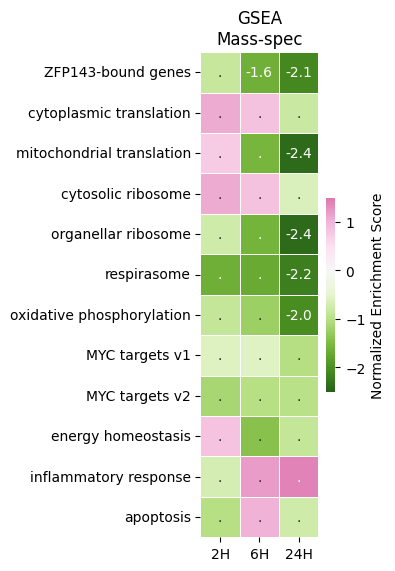

In [30]:
mask = gsea[['FDR_2H', 'FDR_6H', 'FDR_24H']] >= 0.05
mask_annotation = np.reshape(['.' if x==True else round(y, 1) for (x, y) in zip(mask.values.flatten(), gsea[['NES_2H', 'NES_6H', 'NES_24H']].values.flatten())], (len(gsea), 3))

plt.figure(figsize = (1.9, 6.3))
plt.title('GSEA\nMass-spec')
sns.heatmap(gsea[['NES_2H', 'NES_6H', 'NES_24H']], cmap = 'PiYG_r', center = 0, vmin = -2.5, vmax = 1.5, xticklabels = ['2H', '6H', '24H'], 
            yticklabels = [' '.join(x.split('_')[1:]).lower().replace('myc ', 'MYC ').replace('atp ', 'ATP ').replace('target ', 'ZFP143-bound ') for x in gsea['NAME'].values], 
            annot = np.array(mask_annotation), fmt='s', cbar = 2, cbar_kws = {'shrink': 0.4, 'label': 'Normalized Enrichment Score'}, linewidth = 0.5)
plt.show()